In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from scipy.stats import mode 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

In [2]:
db = pd.read_csv(r'D:/Diabetes Database.csv')
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
db.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
db_copy = db.copy(deep = True)
db_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = db_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [7]:
print(db_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


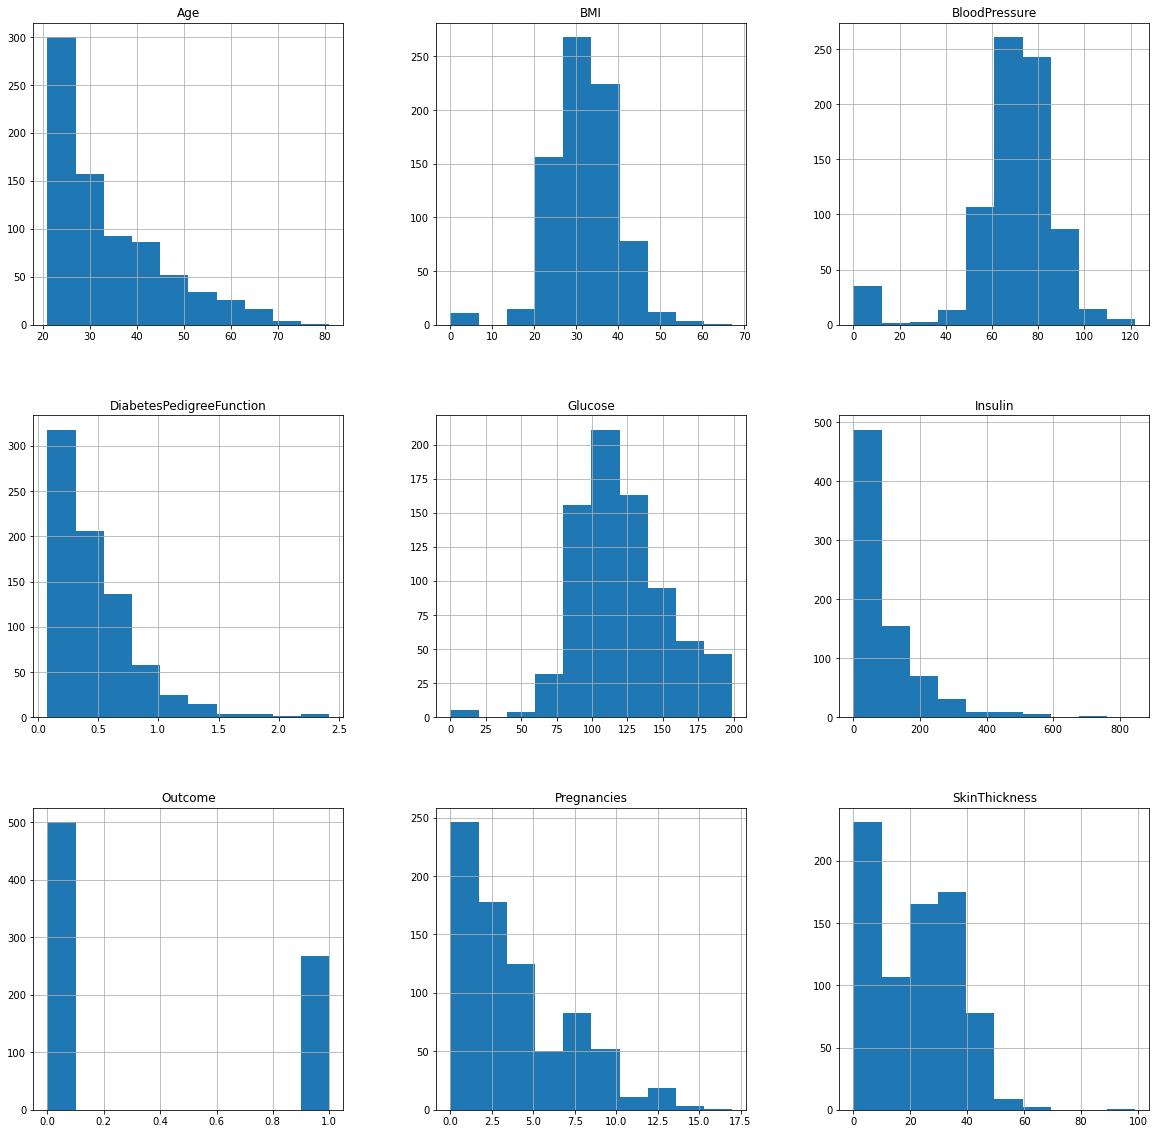

In [8]:
p = db.hist(figsize = (20,20))

In [9]:
db_copy['Glucose'].fillna(db_copy['Glucose'].median(), inplace = True)

In [10]:
db_copy['BloodPressure'].fillna(db_copy['BloodPressure'].mean(), inplace = True)

In [11]:
db_copy['SkinThickness'].fillna(db_copy['SkinThickness'].median(), inplace = True)

In [12]:
db_copy['Insulin'].fillna(db_copy['Insulin'].median(), inplace = True)

In [13]:
db_copy['BMI'].fillna(db_copy['BMI'].median(), inplace = True)

In [14]:
print(db_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


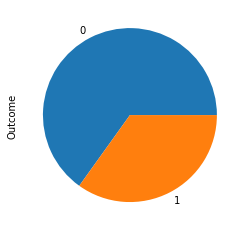

In [15]:
db.Outcome.value_counts().plot(kind="pie")

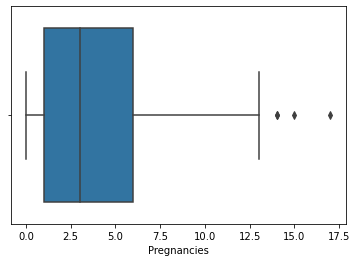

In [16]:
import seaborn as sns
sns.boxplot(x=db["Pregnancies"])

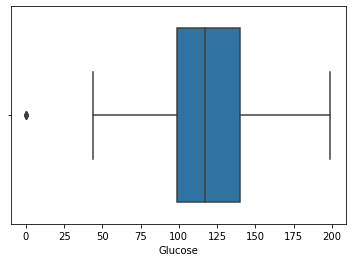

In [17]:
sns.boxplot(x=db["Glucose"])

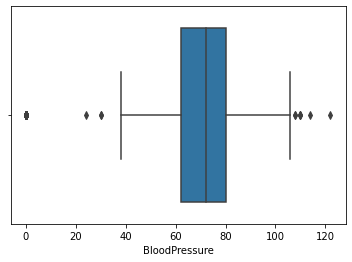

In [18]:
sns.boxplot(x=db["BloodPressure"])

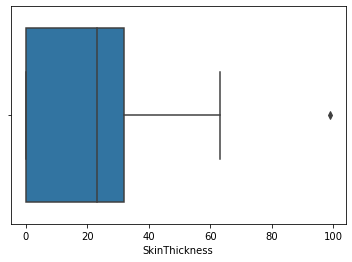

In [19]:
sns.boxplot(x=db["SkinThickness"])

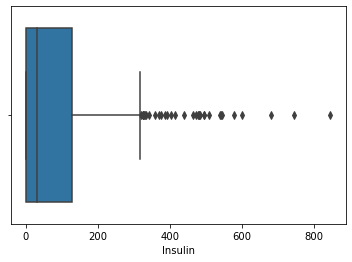

In [20]:
sns.boxplot(x=db["Insulin"])

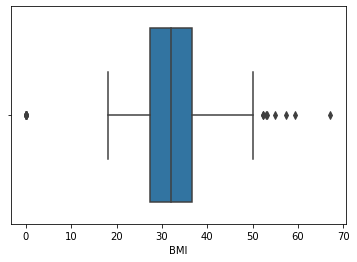

In [21]:
sns.boxplot(x=db["BMI"])

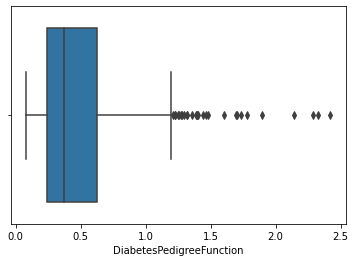

In [22]:
sns.boxplot(x=db["DiabetesPedigreeFunction"])

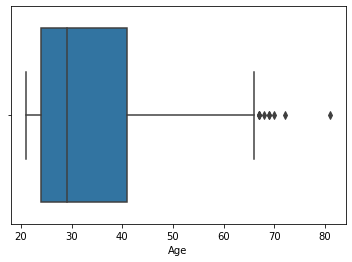

In [23]:
sns.boxplot(x=db["Age"])

In [24]:
#Removing Outliers for Blood Pressure
Q1 = db["BloodPressure"].quantile(0.25)
Q3 = db["BloodPressure"].quantile(0.75)
IQR = Q3 - Q1
db["BloodPressure"] = db["BloodPressure"][~((db["BloodPressure"] < (Q1 - 1.5 * IQR)) |(db["BloodPressure"] > (Q3 + 1.5 * IQR)))]

In [25]:
#Removing Outliers For Insulin
Q1 = db["Insulin"].quantile(0.25)
Q3 = db["Insulin"].quantile(0.75)
IQR = Q3 - Q1
db["Insulin"] = db["Insulin"][~((db["Insulin"] < (Q1 - 1.5 * IQR)) |(db["Insulin"] > (Q3 + 1.5 * IQR)))]

In [26]:
#Removing Outliers for BMI
Q1 = db["BMI"].quantile(0.25)
Q3 = db["BMI"].quantile(0.75)
IQR = Q3 - Q1
db["BMI"] = db["BMI"][~((db["BMI"] < (Q1 - 1.5 * IQR)) |(db["BMI"] > (Q3 + 1.5 * IQR)))]


In [27]:
#Removing Outliers for DPF
Q1 = db["DiabetesPedigreeFunction"].quantile(0.25)
Q3 = db["DiabetesPedigreeFunction"].quantile(0.75)
IQR = Q3 - Q1
db["DiabetesPedigreeFunction"] = db["DiabetesPedigreeFunction"][~((db["DiabetesPedigreeFunction"] < (Q1 - 1.5 * IQR)) |(db["DiabetesPedigreeFunction"] > (Q3 + 1.5 * IQR)))]


In [28]:
db.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             723 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   734 non-null    float64
 5   BMI                       749 non-null    float64
 6   DiabetesPedigreeFunction  739 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [29]:
db.dropna(subset = ["Insulin","BloodPressure","BMI","DiabetesPedigreeFunction","Age"], inplace=True)
db.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               656 non-null    int64  
 1   Glucose                   656 non-null    int64  
 2   BloodPressure             656 non-null    float64
 3   SkinThickness             656 non-null    int64  
 4   Insulin                   656 non-null    float64
 5   BMI                       656 non-null    float64
 6   DiabetesPedigreeFunction  656 non-null    float64
 7   Age                       656 non-null    int64  
 8   Outcome                   656 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 51.2 KB


In [35]:
#scaling
scaler = StandardScaler()
db.iloc[:,:-1] = scaler.fit_transform(db.iloc[:,:-1])

In [32]:
#knn
class K_Nearest_Neighbors_Classifier() :  
      
    def __init__( self, K ) : 
          
        self.K = K 
          
    # Function to store training set 
          
    def fit( self, X_train, Y_train ) : 
          
        self.X_train = X_train 
          
        self.Y_train = Y_train 
          
        # no_of_training_examples, no_of_features 
          
        self.m, self.n = X_train.shape 
      
    # Function for prediction 
          
    def predict( self, X_test ) : 
          
        self.X_test = X_test 
          
        # no_of_test_examples, no_of_features 
          
        self.m_test, self.n = X_test.shape 
          
        # initialize Y_predict 
          
        Y_predict = np.zeros( self.m_test ) 
          
        for i in range( self.m_test ) : 
              
            x = self.X_test[i] 
              
            # find the K nearest neighbors from current test example 
              
            neighbors = np.zeros( self.K ) 
              
            neighbors = self.find_neighbors( x ) 
              
            # most frequent class in K neighbors 
              
            Y_predict[i] = mode( neighbors )[0][0]     
              
        return Y_predict 
      
    # Function to find the K nearest neighbors to current test example 
            
    def find_neighbors( self, x ) : 
          
        # calculate all the euclidean distances between current  
        # test example x and training set X_train 
          
        euclidean_distances = np.zeros( self.m ) 
          
        for i in range( self.m ) : 
              
            d = self.euclidean( x, self.X_train[i] ) 
              
            euclidean_distances[i] = d 
          
        # sort Y_train according to euclidean_distance_array and  
        # store into Y_train_sorted 
          
        inds = euclidean_distances.argsort() 
          
        Y_train_sorted = self.Y_train[inds] 
          
        return Y_train_sorted[:self.K] 
      
    # Function to calculate euclidean distance 
              
    def euclidean( self, x, x_train ) : 
          
        return np.sqrt( np.sum( np.square( x - x_train ) ) ) 
  
# Driver code 
  
def main() : 
      
    # Importing dataset 
      
     
  
    X = db.iloc[:,:-1].values 
  
    Y = db.iloc[:,-1:].values 
      
    # Splitting dataset into train and test set 
  
    X_train, X_test, Y_train, Y_test = train_test_split(  X, Y, test_size = 1/3, random_state = 0 ) 
      
    # Model training 
      
    model = K_Nearest_Neighbors_Classifier( K = 3 ) 
      
    model.fit( X_train, Y_train ) 
      
    model1 = KNeighborsClassifier( n_neighbors = 3 ) 
      
    model1.fit( X_train, Y_train ) 
      
    # Prediction on test set 
  
    Y_pred = model.predict( X_test ) 
      
    Y_pred1 = model1.predict( X_test ) 
      
    # measure performance 
      
    correctly_classified = 0
      
    correctly_classified1 = 0
      
    # counter 
      
    count = 0
      
    for count in range( np.size( Y_pred ) ) : 
          
        if Y_test[count] == Y_pred[count] : 
              
            correctly_classified = correctly_classified + 1
          
        if Y_test[count] == Y_pred1[count] : 
              
            correctly_classified1 = correctly_classified1 + 1
              
        count = count + 1
          
   
    print( "Accuracy   :  ", (  
      correctly_classified1 / count ) * 100 ) 
    
      

In [33]:
if __name__ == "__main__" :  
      
    main()

<ipython-input-32-23222a114947>:104: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model1.fit( X_train, Y_train )


Accuracy   :   73.97260273972603
